In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
#keys: w, t1, t2, t3, BL1, BL2, h, sl, st, Lr1, L1, beta1, beta2, beta3, alpha
keys = ["w", "t1", "t2", "t3", "BL1", "BL2", "h", "sl", "st", "Lr1", "L1", "beta1", "beta2", "beta3", "alpha"]

var = 'alpha'
sweep = []
folder = "."
#loop over txt files in the current directory
for file in os.listdir(folder):
    #skip files that are not txt files
    if not file.endswith(".txt"):
        continue
    #skip files that are not result files
    if not file.startswith("result"):
        continue
    
    #join folder and file name
    file = os.path.join(folder, file)
    
    header = np.loadtxt(file, delimiter=",", max_rows=1)
    data = np.loadtxt(file, delimiter=",", skiprows=1)
    # params = {k:v for k,v in zip(keys, header)}
    sweep.append({"data": data})

# sweep.sort(key=lambda x: x["params"][var])
# sweep.pop(1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


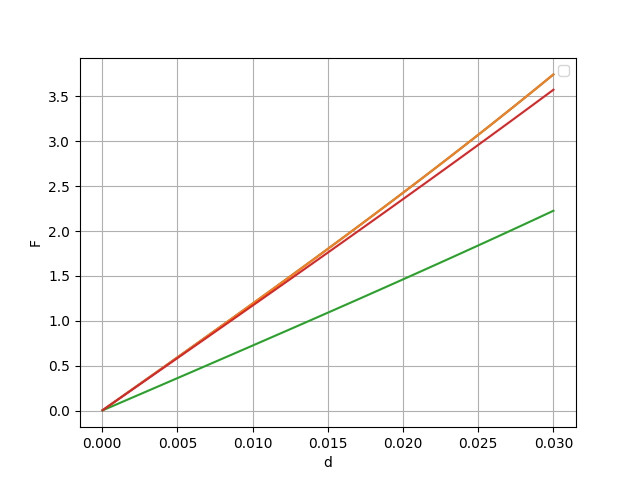

Text(0.5, 1.0, 'Force Profile Tristable')

In [6]:
#loop over sweep and plot the 2nd and 3rd columns of each data array in a new subplot
#create 3d plot
%matplotlib ipympl
fig = plt.figure()


for result in sweep:
    data = result["data"]
    # parameter = result["params"][var]*np.ones_like(data[:,1])
    plt.plot(data[:,1], data[:,2])
    #change line style for each line, dashed, dotted, solid
    

    


plt.grid()

plt.xlabel("d")
plt.ylabel("F")
plt.legend()
plt.show()
plt.title("Force Profile Tristable")


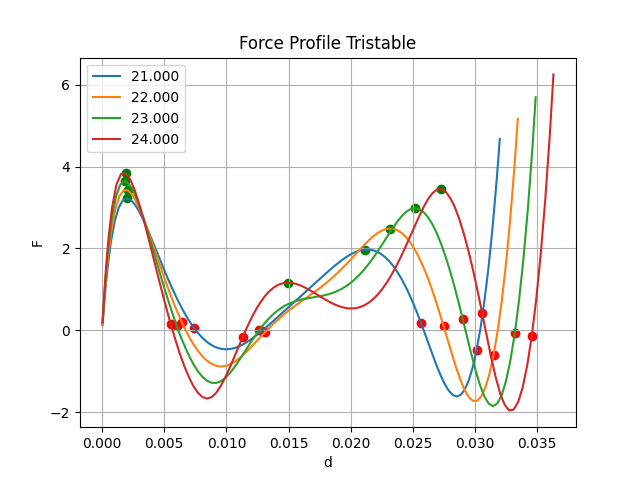

In [33]:
#extract peaks from the data
from scipy.signal import find_peaks
peaks = []
for result in sweep:
    data = result["data"]
    peaks.append(find_peaks(data[:,2], height=0)[0])

#find zero crossings of the data

zero_crossings = []
for result in sweep:
    data = result["data"]
    zero_crossings.append(np.where(np.diff(np.sign(data[:,2])))[0])

#find troughs
troughs = []
for result in sweep:
    data = result["data"]
    troughs.append(find_peaks(-data[:,2], height=0)[0])

#add zero crossings to the plot
for i, result in enumerate(sweep):
    data = result["data"]
    plt.scatter(data[zero_crossings[i],1], data[zero_crossings[i],2], color='red')
    plt.scatter(data[peaks[i],1], data[peaks[i],2], color='green')

plt.show()

In [28]:
zero_crossings


[array([], dtype=int64),
 array([23, 43, 86, 98], dtype=int64),
 array([21, 40, 87, 99], dtype=int64),
 array([19, 35, 88, 99], dtype=int64)]

In [36]:
# get displacement at last zero crossing
for i, result in enumerate(sweep):
    data = result["data"]
    d = data[zero_crossings[i][-1],1]

#get displacement at firs and last peak

    ds1,ds2 =data[peaks[i][0],1], data[peaks[i][-1],1]

#calculate the force at the peaks

    fs1,fs2 =data[peaks[i][0],2], data[peaks[i][-1],2]
    #print alpha parameter
    print(f"alpha={result['params']['alpha']*180/np.pi:0.3f}°")
    result = f"d3={d*1000:.2f}mm, ds1={ds1*1000:.2f}mm, ds2={ds2*1000:.2f}mm, Fs1={fs1:.2f}N, Fs2={fs2:.2f}N"
    print(result)

    Ks1 = fs1/(d-ds1)
    Ks2 = fs2/(d-ds2)
    print(f"Ks1={Ks1:.1f}N/m, Ks2={Ks2:.1f}N/m, Ks2-2Ks1={Ks2-2*Ks1:.1f}N/m\n\n")



alpha=21.000°
d3=30.14mm, ds1=1.98mm, ds2=21.18mm, Fs1=3.22N, Fs2=1.97N
Ks1=114.5N/m, Ks2=220.2N/m, Ks2-2Ks1=-8.8N/m


alpha=22.000°
d3=31.50mm, ds1=2.07mm, ds2=23.14mm, Fs1=3.42N, Fs2=2.49N
Ks1=116.1N/m, Ks2=297.2N/m, Ks2-2Ks1=64.9N/m


alpha=23.000°
d3=33.21mm, ds1=1.81mm, ds2=25.18mm, Fs1=3.64N, Fs2=2.98N
Ks1=116.0N/m, Ks2=371.8N/m, Ks2-2Ks1=139.9N/m


alpha=24.000°
d3=34.57mm, ds1=1.88mm, ds2=27.31mm, Fs1=3.84N, Fs2=3.45N
Ks1=117.4N/m, Ks2=474.6N/m, Ks2-2Ks1=239.8N/m




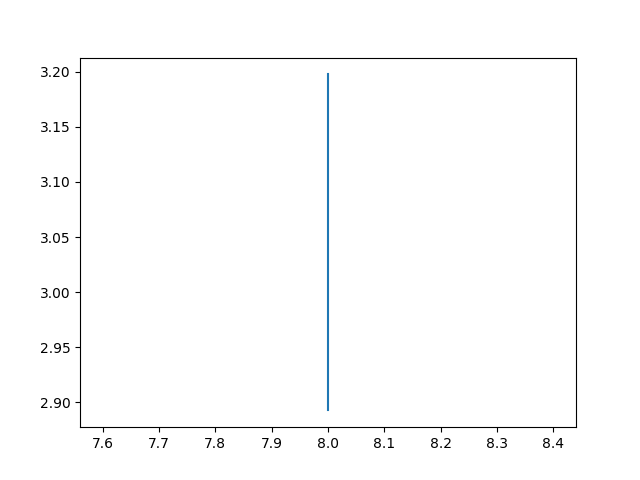

In [13]:

fration = []
for result in sweep[:]:
    data = result["data"]
    maxf = max(data[:,2])
    minf = min(data[:,2])
    ratio = maxf/minf
    fration.append(-ratio)

#plot ratio vs beta2
fig = plt.figure()
plt.plot([result["params"]["beta2"]*180/np.pi for result in sweep[:]], fration)
    #change line style for each line, dashed, dotted, solid

plt.show()